### Housing Price Estimation

Here, we will train a machine learning model to predict housing price based on the below given features. We will use multivariate linear regression to train the model.
- **Feature**: Area of house (measured in square foot), Number of bedrooms, Number of bathrooms, Number of stories in the building, Number of parking spaces.
- **Target**: Price of the house (in $)

The feature values will be normalized using `z-score normalization`.
We will follow the `90-10` rule for segregating the dataset into training and validation sets i.e., 90% of the data will be used for training the model and 10% of the dataset will be used for validating the trained model.

In [26]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from models import LinearRegression
from utils import Normalization

The `prepare_data()` function fetches the data from the CSV file, transforms feature columns with string values into numbers using `One-Hot encoding`, and then converts them into the input feature matrix.

In [27]:
def prepare_data():
    df = pd.read_csv('./datasets/housing.csv')

    df['mainroad_yes'] = df['mainroad'].map({'yes': 1, 'no': 0})
    df['guestroom_yes'] = df['guestroom'].map({'yes': 1, 'no': 0})
    df['basement_yes'] = df['basement'].map({'yes': 1, 'no': 0})
    df['hotwaterheating_yes'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
    df['airconditioning_yes'] = df['airconditioning'].map({'yes': 1, 'no': 0})
    df['prefarea_yes'] = df['prefarea'].map({'yes': 1, 'no': 0})
    df['furnished'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0, 'unfurnished': 0})
    df['semi_furnished'] = df['furnishingstatus'].map({'furnished': 0, 'semi-furnished': 1, 'unfurnished': 0})

    total_rows = df.shape[0]
    train_rows = math.floor(total_rows * 0.9)
    training_set = df[:train_rows]
    validation_set = df[train_rows:]
    print(f"There are {training_set.shape[0]} training rows and {validation_set.shape[0]} validation rows.")

    x_cols = ['bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnished', 'semi_furnished']
    x_tr = None
    for x_col in x_cols:
        if x_tr is None:
            x_tr = training_set[x_col].to_numpy(dtype=float)
            x_tr = np.reshape(x_tr, (x_tr.shape[0], 1))
        else:
            temp = training_set[x_col].to_numpy(dtype=float)
            temp = np.reshape(temp, (temp.shape[0], 1))
            x_tr = np.append(x_tr, temp, axis=1)

    y_tr = training_set['price'].to_numpy(dtype=float)
    y_tr = np.reshape(y_tr, (y_tr.shape[0], 1))
    x_val = None
    for x_col in x_cols:
        if x_val is None:
            x_val = validation_set[x_col].to_numpy(dtype=float)
            x_val = np.reshape(x_val, (x_val.shape[0], 1))
        else:
            temp = validation_set[x_col].to_numpy(dtype=float)
            temp = np.reshape(temp, (temp.shape[0], 1))
            x_val = np.append(x_val, temp, axis=1)
    y_val = validation_set['price'].to_numpy(dtype=float)
    y_val = np.reshape(y_val, (y_val.shape[0], 1))
    return x_tr, y_tr, x_val, y_val

There are 490 training rows and 55 validation rows.
Model parameters: w = [[153578.63263742]
 [381959.45747719]
 [252301.6509599 ]
 [249583.98138162]
 [178009.64785831]
 [136865.80532565]
 [ 80688.78381559]
 [102995.49239412]
 [303264.62877541]
 [220204.77810525]
 [118651.02380174]
 [ 33515.99031252]], b = 4963480.805428165 | Minimum cost value = 8,081,147,179,354.372


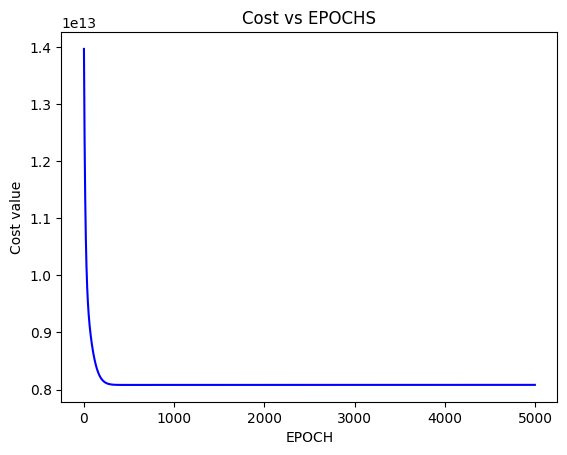

In [28]:
x_train, y_train, x_validate, y_validate = prepare_data()
m, n = x_train.shape
x_norm = Normalization.zscore(x_train)

model = LinearRegression(0.01, 5000, 340)
cost_values = model.train_gd(x_norm, y_train)
print(f"Model parameters: w = {model.w_final}, b = {model.b_final} | Minimum cost value = {model.cost_final:,}")

plt.plot(cost_values, 'b')
plt.title("Cost vs EPOCHS")
plt.xlabel("EPOCH")
plt.ylabel("Cost value")
plt.show()

In [29]:
m_validate, n_validate = x_validate.shape
xv_norm = Normalization.zscore(x_validate)

cost_validate = model.validate(xv_norm, y_validate)
print(f"The minimum cost obtained from training set is {model.cost_final:,}")
print(f"The cost value obtained from validation set is {cost_validate:,}.")

if cost_validate > model.cost_final:
    percent_increase = ((cost_validate / model.cost_final) * 100) - 100
    print(f"Validation cost is {percent_increase:.2f}% higher than the training cost.")
else:
    percent_increase = ((model.cost_final / cost_validate) * 100) - 100
    print(f"Training cost is {percent_increase:.2f}% higher than the validation cost.")

The minimum cost obtained from training set is 8,081,147,179,354.372
The cost value obtained from validation set is 11,030,105,610,374.297.
Validation cost is 36.49% higher than the training cost.
